<a href="https://colab.research.google.com/github/RounakPython/GreyAtom_Hackathons/blob/master/pandas_guided_project_ca_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales report using Pandas
***
## Problem Statement

Hello budding Data Scientists. We have with us a bank data set which gives information about the revenue of various customers spread across different regions in USA.

Using the knowledge of Pandas and Matplotlib, we will try to answer certain questions from the bank dataset  

We will also then scrape certain additional data from Wikipedia, clean it and combine it with our bank data for better understandability of the data.      


## About the Dataset

Preview of the dataset 

![bank_dataset](../images/bank_data.png)

The dataset has details of 15 customers with following 9 features.

|Feature|Description|
|-----|-----|
|account|account Id|
|name|name of the person|
|street|Name of the street|
|city|Name of the city|
|state|Name of the state|
|postal-code|numerical value|
|Jan|Amount in doller|
|Feb|Amount in doller|
|Mar|Amount in doller|




## Why solve this project

Doing this project will enable you to integrate Multiple data sources to answer basic questions. You will also learn to perform common excel tasks with pandas

What will you learn in the session ?
Python Basics
Pandas
Web Scrapping
Functions
Plotting
Pre-requisites
Working knowledge of Pandas, Numpy, Matplotlib
Data indexing and slicing

# Load Data and Compute total
The first step - you know the drill by now - load the [dataset](https://github.com/commit-live-students/GLabs_DSMX/tree/master/Sprint%203%20Data%20Visualization%20and%20Guided%20Hackathon/3.2%20-%20Guided%20Hackathon/pandas_guided_project/data) and see how it looks like. Additionally, calculate the total amount in the first quarter of the financial year. Calculate the total amount of all the users for the month of jan, feb and Mar and also grand total. 
  

## Instructions

- Load dataset using pandas read_csv api in variable `df` and give file path of the dataset.
- The names of the states `state` column are changed to lower case and store it in `df['state']`
- Create a new column named `total` which computes the total amount in the first quarter
  of the financial year i.e. for the months of Jan, Feb and Mar and store it in `df['total']`
- Calculate the sum of amount of all users in the Month of Jan, Feb, March and store it in variable `sum_row` 
 (Here the sum implies the sum of all the entries in the `Jan Column`, sum of entries in `Feb` Column and Grand total stands for the sum of entries in the column `total`)
- Append this computed sum to the DataFrame `df_final` 




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Code starts here
df = pd.read_csv('/content/drive/My Drive/Python/Data/pandas_guided_project/data/excel-comp-data.csv')
print(df.head())

df['state'] = df['state'].apply(lambda x:x.lower())
df['total'] = df['Jan'] + df['Feb'] + df['Mar']

sum_row = df[['Jan', 'Feb', 'Mar', 'total']].sum()
df_final = df.append(sum_row, ignore_index=True)
#Code ends here

   account                         name  ...     Feb    Mar
0   211829   Kerluke, Koepp and Hilpert  ...   62000  35000
1   320563               Walter-Trantow  ...   45000  35000
2   648336   Bashirian, Kunde and Price  ...  120000  35000
3   109996  D'Amore, Gleichner and Bode  ...  120000  10000
4   121213                Bauch-Goldner  ...  120000  35000

[5 rows x 9 columns]


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Scrape Data From the web 

Here, you will be scraping data from the web and cleaning it. 
 
  
## Instructions:

- Scrapes the url `https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations` and store it in variable `url`
- Use module `requests` to `get` the url and store it in variable called `response`
- load the html file in dataframe `df1`. `Note`:use `pd.read_html(response.content)[0]`.   
- First few rows consists of unclean data. You need to select rows from index 11 till end. Make the values at index 11 as column headers and store it in dataframe `df1`.
- Remove space from the column named 'United States of America' and store the result in dataframe called `df1['United States of America']`



In [0]:
import requests

# Code starts here
url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations'

response = requests.get(url)
df1 = pd.read_html(response.content)[0]

df1 = df1.iloc[10:,:]
df1 = df1.rename(columns=df1.iloc[0, :]).iloc[1:, :]
#print(df1.dtypes)
df1['United States of America'] = df1['United States of America'].apply(lambda x : x.replace(' ','')).astype(object)

# Code ends here

# Mapping Countries to their abbreviations

Using the data scraped from the previous task, map abbriviation to the name of states.
 
  

## Instructions:
 
- Using the scraped data create a variable called `mapping` which has the Country
 as key and Abbreviation as value
- Create a new column called `abbr` as the 7th column (index = 6) of the DataFrame `df_final`
- map the `df_final['state']` on variable `mapping` and store it in `df_final['abbr']` 



In [0]:
# Code Starts here
mapping = df1.set_index('United States of America')['US'].to_dict()
df_final.insert(6, 'abbr', np.nan)
df_final['abbr'] = df_final['state'].map(mapping)
df_final.head()
# Code ends here

,account,name,street,city,state,postal-code,abbr,Jan,Feb,Mar,total
0,211829.0,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,texas,28752.0,NaN,10000.0,62000.0,35000.0,107000.0
1,320563.0,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,northcarolina,38365.0,NaN,95000.0,45000.0,35000.0,175000.0
2,648336.0,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,iowa,76517.0,NaN,91000.0,120000.0,35000.0,246000.0
3,109996.0,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,maine,46021.0,NaN,45000.0,120000.0,10000.0,175000.0
4,121213.0,Bauch-Goldner,7274 Marissa Common,Shanahanchester,california,49681.0,NaN,162000.0,120000.0,35000.0,317000.0


# Filling in the Missing Values

What you will notice in the previous task is that for two states Mississippi and Tennessee will have NaN values in column `abbr`. In this task you will be filling those missing values manually. 
 
  

## Intructions :  
- Locate the NaN in the abbr and replace `mississipi` with `MS` and store it in `df_mississipi`
- Locate the NaN in the abbr and replace `tenessee` with `TN` and store it in `df_tenessee`
- update the df_final



In [0]:
# Code starts here
df_mississipi = df_final[df_final['state'] == 'mississipi'].replace(np.nan, 'MS')
df_tenessee = df_final[df_final['state'] == 'tenessee'].replace(np.nan, 'TN')

df_final.replace(df_final.iloc[6], df_mississipi, inplace=True)
df_final.replace(df_final.iloc[10], df_tenessee, inplace=True)
# Code ends here
    

## Total amount bank hold  


Here, use the newly created abbr column to understand the total amount that the bank holds in each state. Let us make this data frame more readable by introducing units in this case `$` sign representing the unit of mone
 
  

## Instructions :
  
- Groups by `abbr` and finds the sum of aabr,jan,feb ,mar and total store the result in `df_sub`
- Write a `lambda function` to introduce `$` sign infromt of all the numbers using `applymap` and store the result in `formatted_df`




In [0]:
# Code starts here
df_sub = df_final.groupby(['abbr'])['Jan', 'Feb', 'Mar', 'total'].sum()

formatted_df = df_sub.applymap(lambda x:"${:,.0f}".format(x))

# Code ends here




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


# Append a row to the DataFrame

In this task, you will append a row to the data frame which will give us information about the total amount of the various regions in Jan, Feb and march and also the grand total
 
## Instructions :

- Computes the sum of amount of all users in the Month of Jan, Feb, March and the  total in variable called `sum_row` 
 (Here the sum implies the sum of all the entries in the `Jan Column`, sum of entries in `Feb` Column and Grand total stands for the sum of entries in the column `total`)
- Tranpose the dataframe `sum_row` and store it in new dataframe `df_sub_sum` 
- Make sure you append the `$` to all the digits and store it in dataframe `df_sub_sum` .
- Append this computed sum to the DataFrame `final_table` 
- rename the index of `final_table` to  `{0: "Total"}` 




In [0]:
# Code starts here
sum_row = df_sub[['Jan', 'Feb', 'Mar', 'total']].sum()
df_sub_sum = pd.DataFrame(data=sum_row).T

df_sub_sum = df_sub_sum.applymap(lambda x: "${:,.0f}".format(x))

final_table = formatted_df.append(df_sub_sum)

final_table = final_table.rename(index={0: 'Total'})
print(final_table.head())

# Code ends here

            Jan       Feb       Mar     total
MS      $62,000  $120,000   $70,000  $252,000
TN      $45,000  $120,000   $55,000  $220,000
Total  $107,000  $240,000  $125,000  $472,000


# Pie chart for total


Having prepared all the data now its time to present the results visually
 
## Instructions :
- add the total of all the three months and store it in variable called `df_sub['total']`
- plot the pie chart for the `df_sub['total']`




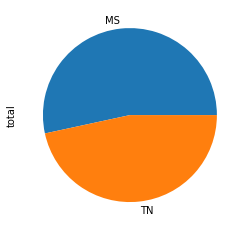

In [0]:
# Code starts here
df_sub['total'] = df_sub['Jan'] + df_sub['Feb'] + df_sub['Mar']

df_sub['total'].plot(kind= 'pie')
plt.show()
# Code ends here